<h1> House Prediction In the Us </h1>
<h2> Problem Statement </h2>
<p> A project that is used to create a model that predicts prices of houses in the last twenty years. The model is to explain how the factors have influenced the prices.
We use the S& P Case-Schiller Home Price Index as a proxy</p>
<h2> Business Goal </h2>
<ol>
<li> 
 Understanding which variables are significant in predicting the price of a house</li>
<li> How well those variables describe the price of a house.</li>

</ol>


In [2]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
d = r'C:\Users\User\Esther\Python\Housing.csv'
df = pd.read_csv(d)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.shape

(545, 13)

Our data has 545 rows and 13 columns. No nulls noted in the data.

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<h2> Exploratory Data Analysis </h2>


In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

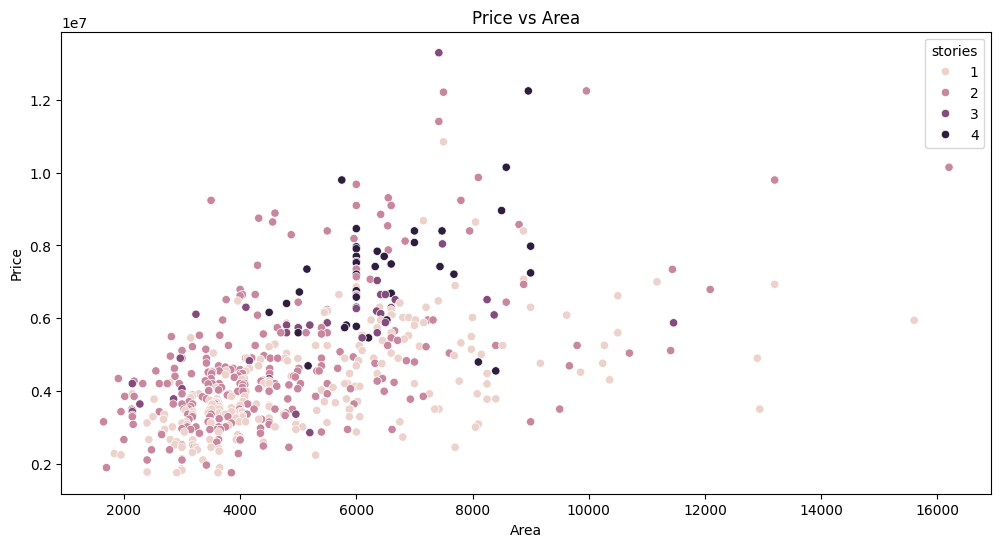

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='area', y='price', data = df, hue ='stories')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [9]:
cat_obj_cols = df.select_dtypes(include='object') 
cat_obj_cols

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
cat_int_cols = df.select_dtypes(include='int') 
cat_int_cols.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


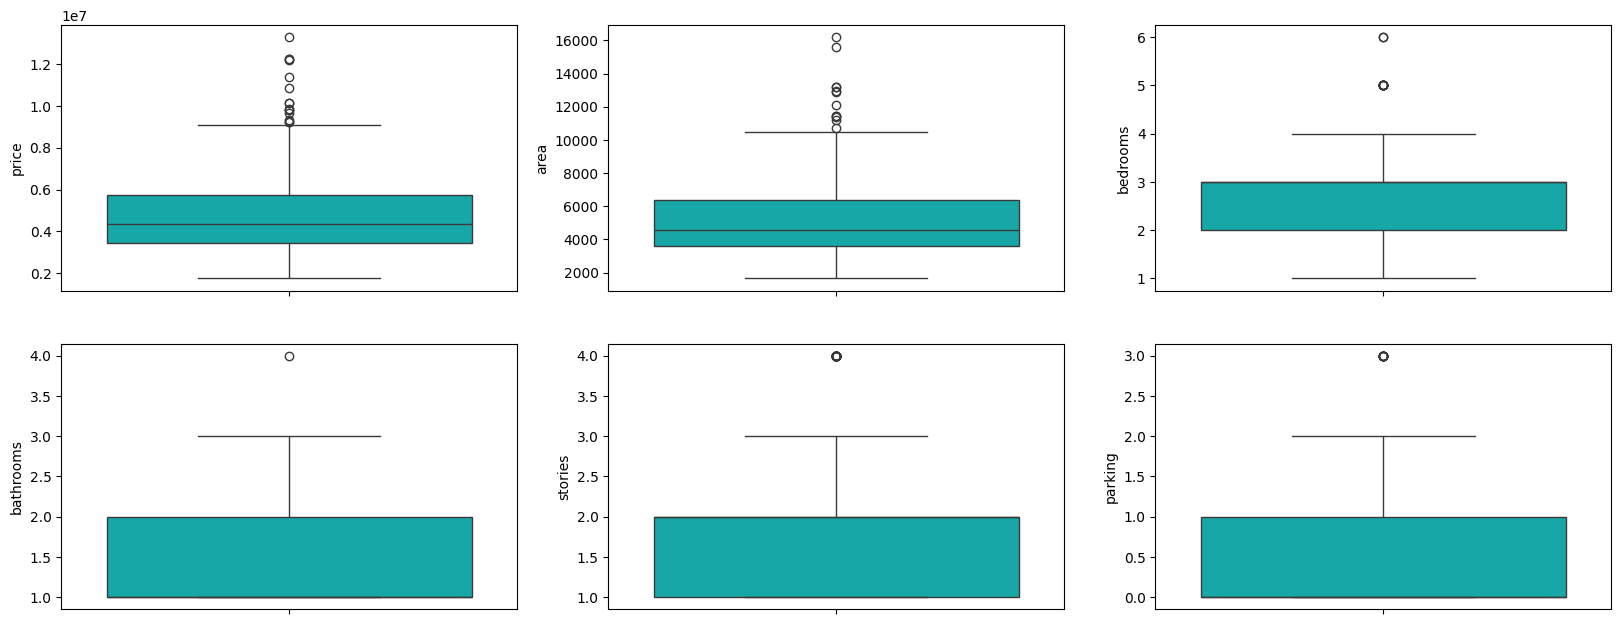

In [12]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'price', color='c', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'area', color='c', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'bedrooms', color='c', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'bathrooms', color='c', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'stories', color='c', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'parking', color='c', data = df)


plt.show()

In [13]:
#   Cstegorize categorical data into code


# df['d_mainroad'] = df['mainroad'].map({'yes':1, "no": 0})
# df['d_furnishingstatus'] = df['furnishingstatus'].map({"unfurnished": 3,'furnished':1, "semi-furnished": 0})
# df['d_guestroom'] = df['guestroom'].map({'yes':1, "no": 0})
# df['d_basement'] = df['basement'].map({'yes':1, "no": 0})
# df['d_hotwaterheating'] = df['hotwaterheating'].map({'yes':1, "no": 0})
# df['d_airconditioning'] = df['airconditioning'].map({'yes':1, "no": 0})
# df['d_prefarea'] = df['prefarea'].map({'yes':1, "no": 0})
# df = df.drop(['mainroad','furnishingstatus','guestroom','basement','airconditioning','hotwaterheating','prefarea'], axis=1)


In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
# d_price = pd.get_dummies(df['price'], prefix='price', drop_first = True)
# df = pd.concat([df, d_price], axis = 1)
# d_area = pd.get_dummies(df['area'], prefix='area', drop_first = True)
# df = pd.concat([df, d_area], axis = 1)
# d_bedrooms = pd.get_dummies(df['bedrooms'], prefix='bedrooms', drop_first = True)
# df = pd.concat([df, d_bedrooms], axis = 1)
# d_bathrooms = pd.get_dummies(df['bathrooms'], prefix='bathrooms', drop_first = True)
# df = pd.concat([df, d_bathrooms], axis = 1)
# d_stories= pd.get_dummies(df['stories'], prefix='stories', drop_first = True)
# df = pd.concat([df, d_stories], axis = 1)
# # d_mainroad= pd.get_dummies(df['mainroad'], prefix='mainroad', drop_first = True)
# # df = pd.concat([df, d_mainroad], axis = 1)
# # d_guestroom = pd.get_dummies(df['guestroom'], prefix='guestroom', drop_first = True)
# # df = pd.concat([df, d_guestroom], axis = 1)
# # d_basement= pd.get_dummies(df['basement'], prefix='basement', drop_first = True)
# # df = pd.concat([df, d_basement], axis = 1)
# # d_hotwaterheating= pd.get_dummies(df['hotwaterheating'], prefix='hotwaterheating', drop_first = True)
# # df = pd.concat([df, d_hotwaterheating], axis = 1)
# # d_airconditioning= pd.get_dummies(df['airconditioning'], prefix='airconditioning', drop_first = True)
# # df = pd.concat([df, d_airconditioning], axis = 1)
# d_parking= pd.get_dummies(df['parking'], prefix='parking', drop_first = True)
# df = pd.concat([df, d_parking], axis = 1)
# d_prefarea= pd.get_dummies(df['prefarea'], prefix='prefarea', drop_first = True)
# df = pd.concat([df, d_prefarea], axis = 1)
# d_furnishingstatus= pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus', drop_first = True)
# df = pd.concat([df, d_furnishingstatus], axis = 1)

In [16]:
from category_encoders import OneHotEncoder

In [17]:
# orig_before_dum_cols = ['parking','stories','bathrooms','bedrooms','area']
# df = df.drop(orig_before_dum_cols, axis=1)


<h4> Remove Outliers </h4>

In [18]:
low, high = df["price"].quantile([0.1, 0.9])
mask_price = df["price"].between(low, high)
    
df = df[mask_price]

low, high = df["area"].quantile([0.1, 0.9])
mask_area = df["area"].between(low, high)
    
df = df[mask_area]


In [19]:
#Percentage of retained data
total_records= df.shape[0] 

retained_data = round(100*(len(df)/total_records),2)
print(retained_data,"%")

100.0 %


<h2> Data Visualization </h2>


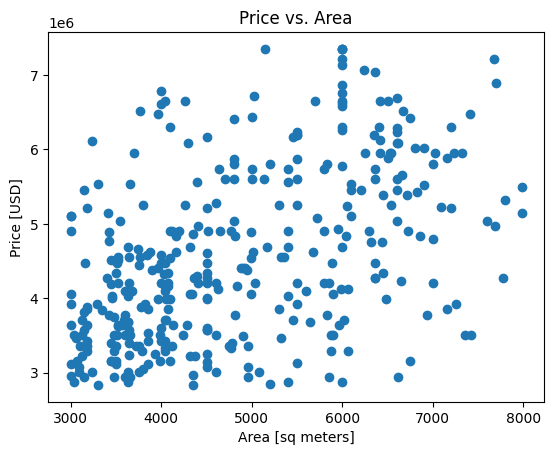

In [20]:
# Plot price vs area
plt.scatter(df['area'],df['price'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price vs. Area')
plt.show()

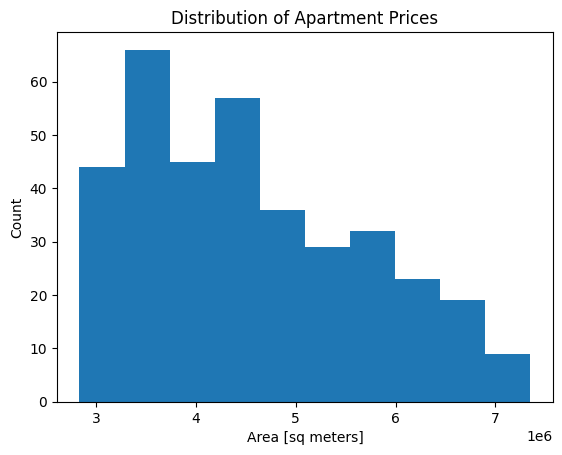

In [21]:
# Plot distribution of price
plt.hist(df['price'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Count')
plt.title('Distribution of Apartment Prices')
plt.show()

In [22]:
import warnings
from glob import glob


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [23]:
# from category_encoders import OneHotEncoder

<h3> Split Data </h3>

In [24]:
X_train = df.drop(columns=['price'])
y_train = df['price']

<h3> Baseline </h3>

In [25]:
#Calculate the baseline mean absolute error for your model
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 4562930.555555556
Baseline MAE: 964354.2438271606


<h3>Iterate </h3>

In [26]:
# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer()
    ,Ridge())
# Fit model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['mainroad', 'guestroom', 'basement',
                                     'hotwaterheating', 'airconditioning',
                                     'prefarea', 'furnishingstatus'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [29]:
# retrieve intercept
intercept = model.named_steps["ridge"].intercept_

# retrieve coefficients
coefficients = model.named_steps["ridge"].coef_

# retrieve names
features = model.named_steps["onehotencoder"].get_feature_names_out()

# create a series of names and values
feat_imp = pd.Series(coefficients, index=features)
feat_imp

area                                  216.875328
bedrooms                            46661.817864
bathrooms                          630816.287564
stories                            370673.079973
mainroad_yes                       233578.845915
mainroad_no                       -233578.845915
guestroom_yes                      158276.114489
guestroom_no                      -158276.114489
basement_no                        -78059.077748
basement_yes                        78059.077748
hotwaterheating_no                -226128.285904
hotwaterheating_yes                226128.285904
airconditioning_yes                277744.848776
airconditioning_no                -277744.848776
parking                             98896.880346
prefarea_no                       -306778.106859
prefarea_yes                       306778.106859
furnishingstatus_furnished          58874.844165
furnishingstatus_semi-furnished     94095.582932
furnishingstatus_unfurnished      -152970.427097
dtype: float64

In [31]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

<h3> Feature Scaling </h3>

In [32]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

NameError: name 'binary_cols' is not defined